## Lead Scoring Assignment
- with 36 predictor variables provided to us we need to find out whether a potential customer will take a course for X education or not. This is called conversion.

### Step 1: importing data and necessary libraries
- Before starting with our data analysis ,visualizations and model building let's import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [2]:
#Importing numpy, pandas for data anaysis. 
import numpy as np
import pandas as pd
#Improting Matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Impoting sklearn for building the logistic regression model
from sklearn.linear_model import LogisticRegression

In [3]:
import warnings
warnings.filterwarnings('ignore') #using this library to avoid any warnings

pd.set_option('display.max_columns', None)#To see all the columns of the dataframe

In [4]:
#Let's first read our database
leads = pd.read_csv("Leads.csv")

### Step 2: Data Preparation

In [5]:
#Let's look how our dataset looks like
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Let's look at the shape of our dataset
leads.shape

(9240, 37)

In [7]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Summary of the dataset: 9240 rows, 37 columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#Let's take care of the columns containing null values before moving forward

In [10]:
#Checking for null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#percentage of null values
(leads.isnull().sum()/leads.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
#values in lead quality which is an important column for our analysis
leads['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [13]:
#replace the null values in lead quality to Unknown
leads['Lead Quality']=leads['Lead Quality'].fillna('unknown')

In [14]:
leads['Lead Quality'].isnull().sum() # No null records in Lead Quality column

0

In [15]:
#Give a list of columns having null values greater than 40%
missing_val_col=[]
for i in leads.columns:
    if (leads[i].isnull().mean())*100 > 40:
        missing_val_col.append(i)
missing_val_col

['Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [16]:
# Now the above variables more than 40% of records as null still it is not a good idea to drop all of them.
#Let's only keep Asymmetrique Activity Index as it is a good indicator of the lead's engagement with the platform.

In [17]:
col=missing_val_col.pop(0)
print(col)

Asymmetrique Activity Index


In [18]:
for i in missing_val_col:
    leads=leads.drop(i,axis=1)

In [19]:
leads[col]=leads[col].fillna('unknown')

In [20]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [21]:
#Let's mitigate the null values for remaining columns as well

In [22]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [23]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [24]:
#Now the above variables have 'Select' as a value which is mentioned to us in the problem statement is as good as null.
#So let's make it that way
leads.replace('Select',np.nan,inplace=True)

In [25]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,unknown,No,No,NaN,NaN,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,No,No,Modified


In [26]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [27]:
(leads.isnull().sum()/leads.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [28]:
#Lets,Prepare a list of columns with null values more than 25% and replace the null values with unknown

In [29]:
cols=(leads.isnull().sum()/leads.shape[0])*100
cols=cols[cols>25]

print(cols)

Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     74.188312
City                                             39.707792
dtype: float64


In [30]:
cols=cols.index.tolist()
print(cols)

['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City']


In [31]:
for i in cols:
    leads[i]=leads[i].fillna('unknown')

In [32]:
leads.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                             

In [33]:
leads.shape

(9240, 34)

In [34]:
# In the remaining columns we can see very small amount of null values are present.
# So now we can drop the records containing null values from our dataframe.

In [35]:
leads=leads.dropna()
leads.shape

(9074, 34)

In [36]:
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [37]:
#Before going forward let's make the 'Lead Number'  variable as object type, as it may affect our analysis
#Also, let's drop the 'Prospect ID' column as 'lead' column in enough to identify individual record
leads['Lead Number'] = leads['Lead Number'].astype('object')
leads = leads.drop(['Prospect ID'],axis= 1)

In [38]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,unknown,unknown,02.Medium,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,unknown,No,No,unknown,unknown,02.Medium,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,unknown,Mumbai,02.Medium,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,unknown,Mumbai,02.Medium,No,No,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [39]:
#Before converting some binary variables to 0/1 there are certain variables with only one value "No".
#These Variables are insignificant in our analysis.

leads = leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis= 1)

In [40]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,unknown,unknown,02.Medium,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,unknown,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,unknown,unknown,unknown,02.Medium,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,unknown,Mumbai,02.Medium,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,unknown,Mumbai,02.Medium,No,Modified


In [41]:
#Let's convert binary variables (Yes/No) in to numeric (1/0)
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [42]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,Low in Relevance,unknown,unknown,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,unknown,unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,unknown,unknown,unknown,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,unknown,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Not Sure,unknown,Mumbai,02.Medium,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,unknown,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Might be,unknown,Mumbai,02.Medium,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [43]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity']], drop_first=True).astype(int)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [44]:
leads['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
unknown      4153
02.Medium    3739
01.High       820
03.Low        362
Name: count, dtype: int64

In [45]:
# Creating dummy variables for the remaining categorical variables and dropping the level with _unknown and _NaN.

# Creating dummy variables for the variable 'Specialization'
sl = pd.get_dummies(leads['Specialization'], prefix='Specialization').astype(int)
# Dropping MultipleLines_No phone service column
s1 = sl.drop(['Specialization_unknown'], axis= 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,s1], axis=1)

# Creating dummy variables for the variable 'Specialization'
hl = pd.get_dummies(leads['How did you hear about X Education'], prefix='Hearsay').astype(int)
# Dropping MultipleLines_No phone service column
h1 = hl.drop(['Hearsay_unknown'], axis= 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,h1], axis=1)

# Creating dummy variables for the variable 'Specialization'
ol = pd.get_dummies(leads['What is your current occupation'], prefix='occupation').astype(int)
# Dropping MultipleLines_No phone service column
o1 = ol.drop(['occupation_unknown'], axis= 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,o1], axis=1)

# Creating dummy variables for the variable 'Specialization'
ll = pd.get_dummies(leads['Lead Quality'], prefix='Lead Quality').astype(int)
# Dropping MultipleLines_No phone service column
l1 = ll.drop(['Lead Quality_unknown'], axis= 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,l1], axis=1)

# Creating dummy variables for the variable 'Specialization'
l2 = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile').astype(int).astype(int)
# Dropping MultipleLines_No phone service column
l2 = l2.drop(['Lead Profile_unknown'], axis= 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,l2], axis=1)

# Creating dummy variables for the variable 'Specialization'
a1 = pd.get_dummies(leads['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index').astype(int)
# Dropping MultipleLines_No phone service column
a1 = a1.drop(['Asymmetrique Activity Index_unknown'], axis= 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,a1], axis=1)

# Creating dummy variables for the variable 'Specialization'
l3 = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity',drop_first=True).astype(int)

#Adding the results to the master dataframe
leads = pd.concat([leads,l3], axis=1)

In [46]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Hearsay_Advertisements,Hearsay_Email,Hearsay_Multiple Sources,Hearsay_Online Search,Hearsay_Other,Hearsay_SMS,Hearsay_Social Media,Hearsay_Student of SomeSchool,Hearsay_Word Of Mouth,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,unknown,unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,Low in Relevance,unknown,unknown,02.Medium,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic S

In [47]:
##Dropping the categorical variables.
leads = leads.drop(['Lead Origin','Lead Number','Lead Source','Last Activity','Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City','Lead Quality','Lead Profile','Asymmetrique Activity Index','Last Notable Activity'], axis = 1)

In [48]:
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Hearsay_Advertisements,Hearsay_Email,Hearsay_Multiple Sources,Hearsay_Online Search,Hearsay_Other,Hearsay_SMS,Hearsay_Social Media,Hearsay_Student of SomeSchool,Hearsay_Word Of Mouth,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.

In [49]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Columns: 113 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int32(100), int64(11)
memory usage: 4.4 MB


In [50]:
print(leads.dtypes)

Do Not Email                                            int64
Do Not Call                                             int64
Converted                                               int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
                                                       ...   
Last Notable Activity_Resubscribed to emails            int32
Last Notable Activity_SMS Sent                          int32
Last Notable Activity_Unreachable                       int32
Last Notable Activity_Unsubscribed                      int32
Last Notable Activity_View in browser link Clicked      int32
Length: 113, dtype: object


In [51]:
# Now all the columns are in numeric format, we can proceed with the Regression part of our assignment

### Step 4: Test-Train Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
y=leads['Converted']
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Hearsay_Advertisements,Hearsay_Email,Hearsay_Multiple Sources,Hearsay_Online Search,Hearsay_Other,Hearsay_SMS,Hearsay_Social Media,Hearsay_Student of SomeSchool,Hearsay_Word Of Mouth,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [55]:
X_train.shape

(6351, 112)

In [56]:
y_train.shape

(6351,)

In [57]:
X_test.shape

(2723, 112)

In [58]:
y_test.shape

(2723,)

### Step 5: Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Hearsay_Advertisements,Hearsay_Email,Hearsay_Multiple Sources,Hearsay_Online Search,Hearsay_Other,Hearsay_SMS,Hearsay_Social Media,Hearsay_Student of SomeSchool,Hearsay_Word Of Mouth,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8174,0,0,-0.674263,-0.892446,-1.144323,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6986,0,0,-0.674263,-0.892446,-1.144323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8112,0,0,-0.674263,-0.892446,-1.144323,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,

In [61]:
### Checking the Conversion Rate
conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion

37.85541106458012

In [62]:
# We have a 37% conversion rate but, according to our problem statement the conversion rate should be around 80%.

### Step 6: Looking at Correlations

In [63]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

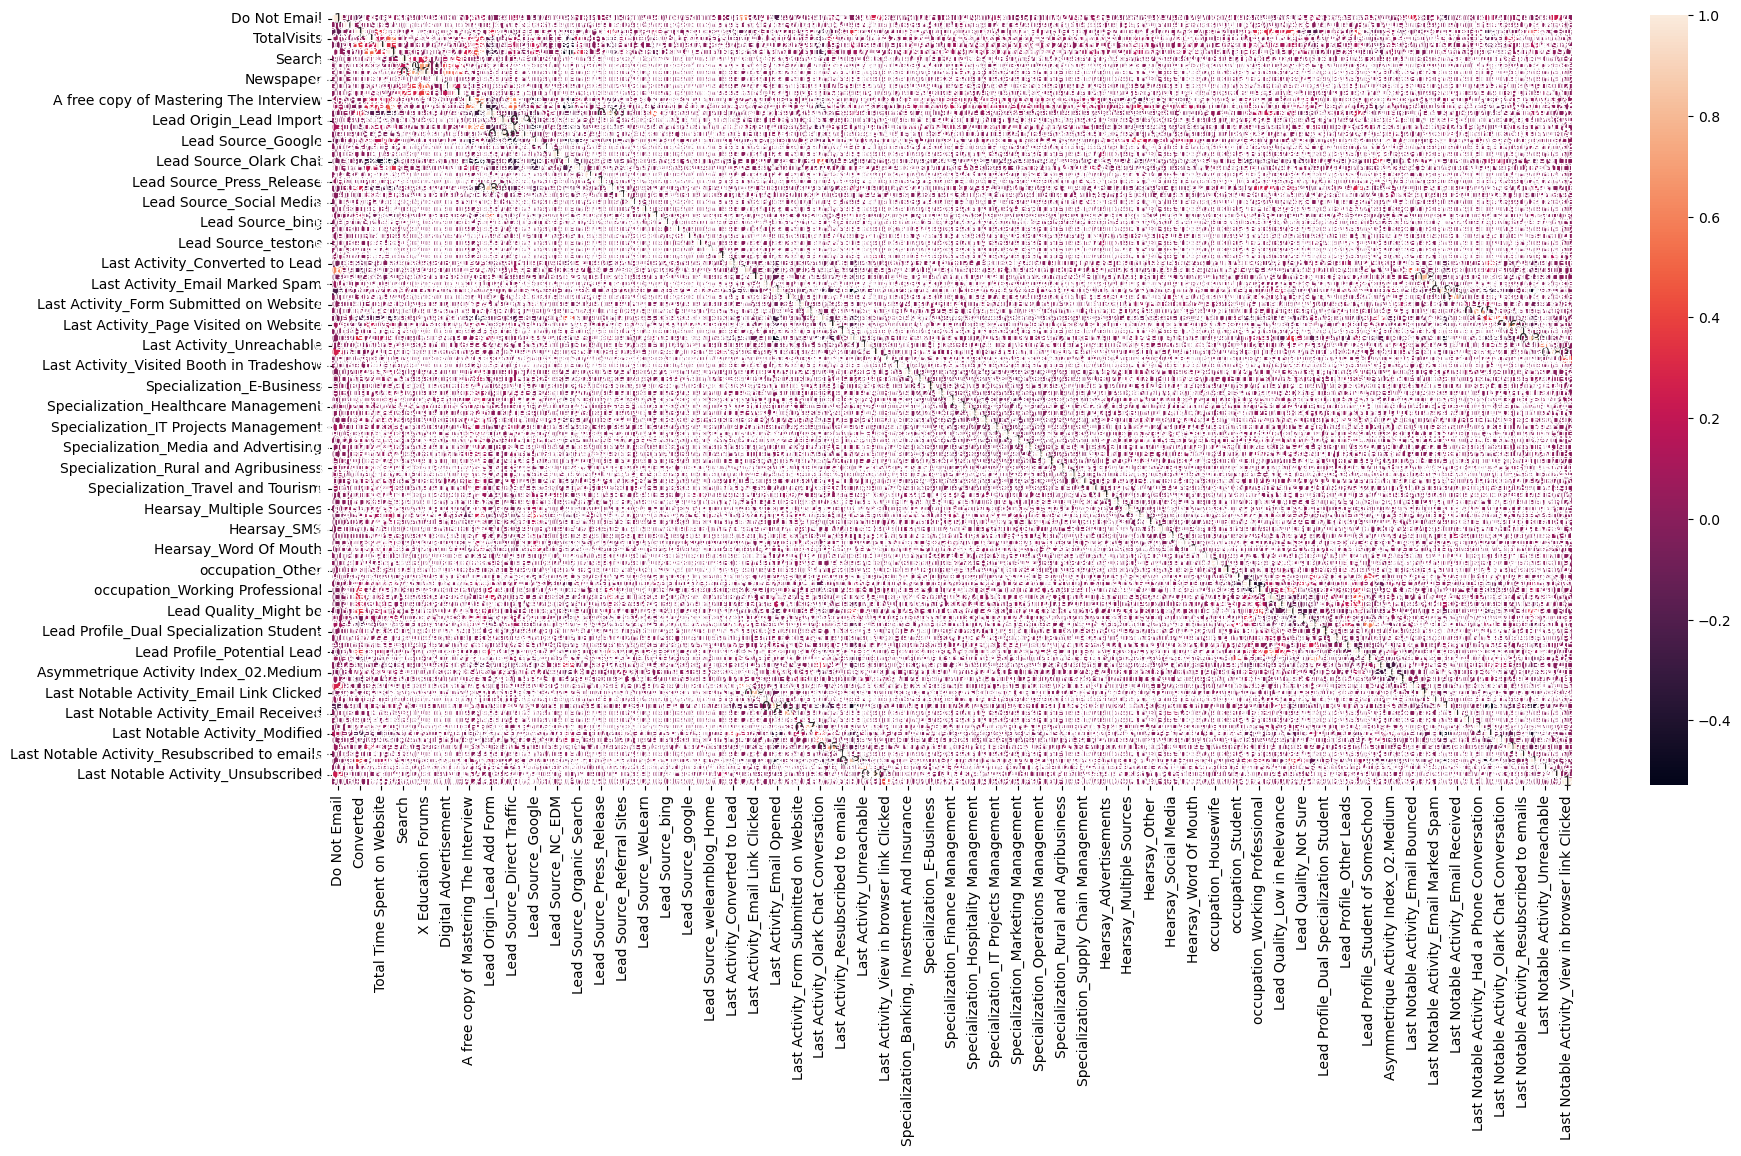

In [64]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [65]:
leads.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Hearsay_Advertisements,Hearsay_Email,Hearsay_Multiple Sources,Hearsay_Online Search,Hearsay_Other,Hearsay_SMS,Hearsay_Social Media,Hearsay_Student of SomeSchool,Hearsay_Word Of Mouth,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.004346,-0.140786,0.035715,-0.046192,0.036403,-0.011505,-0.004346,-0.003073,-0.003073,-0.006147,-0.008132,0.058023,0.099661,-0.031468,-0.016857,0.112262,-0.017137,-0.071484,-0.004346,-0.003073,-0.051070,0.035510,-0.003073,0.050729,-0.035958,-0.010042,-0.004346,-0.003073,0.002835,-0.007529,-0.003073,0.010547,-0.003073,-0.003073,0.035869,-0.063193,0.620041,-0.043705,0.050729,-0.220691,-0.004346,-0.018751,-0.007586,-0.055115,0.083819,-0.003073,-0.019915,0.007831,0.261142,-0.007529,-0.003073,-0.020451,0.005017,0.012947,0.030648,-0.004882,0.011606,0.012054,-0.018428,0.070893,0.003297,-0.025537,0.000169,-0.013224,0.023922,0.028553,0.054570,0.003625,0.061126,0.002226,-0.015690,-0.02546

### Step 7: Model Building

In [66]:
import statsmodels.api as sm

In [67]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                          103
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 20 Aug 2024   Deviance:                       98366.
Time:                        22:12:34   Pearson chi2:                 4.81e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                2.89e+27    9.8e+19   2.95e+07      0.000    2.89e+27    2.89e+27
Do Not Email                                       -3.082e+14   4.53e+06   -6.8e+07      0.000   -3.08e+14   -3.08e+14
Do Not Call                                         1.451e+16   4.83e+07      3e+08      0.000    1.45e+16    1.45e+16
TotalVisits                                         4.955e+13   1.01e+06   4.93e+07      0.000    4.96e+13    4.96e+13
Total Time Spent on Website                         1.622e+14   1.01e+06   1.61e+08      0.000    1.62e+14    1.62e+14
Page Views Per Visit                               -9.605e+13   1.27e+06  -7.54e+07      0.000    -9.6e+13    -9.6e+13
Search                                              -1.28e+14   2.62e+07  -4.89e+06      0.000   -1.28e+14   -1.28e+14
Newspaper Article                                    6.78e+24    2.3e+17   2.95e+07      0.000    6.78e+24    6.78e+24
X Education Forums                                  -6.78e+24    2.3e+17  -2.95e+07      0.000   -6.78e+24   -6.78e+24
Newspaper                                          -1.305e+24   4.43e+16  -2.95e+07      0.000   -1.31e+24   -1.31e+24
Digital Advertisement                                -2.8e+15   6.74e+07  -4.15e+07      0.000    -2.8e+15    -2.8e+15
Through Recommendations                             7.165e+14   3.99e+07    1.8e+07      0.000    7.17e+14    7.17e+14
A free copy of Mastering The Interview              3.462e+13   3.31e+06   1.05e+07      0.000    3.46e+13    3.46e+13
Lead Origin_Landing Page Submission                -1.333e+14   3.97e+06  -3.36e+07      0.000   -1.33e+14   -1.33e+14
Lead Origin_Lead Add Form                          -4.354e+15   6.73e+07  -6.47e+07      0.000   -4.35e+15   -4.35e+15
Lead Origin_Lead Import                             3.283e+15   6.92e+07   4.74e+07      0.000    3.28e+15    3.28e+15
Lead Source_Direct Traffic                         -3.584e+15   8.25e+07  -4.34e+07      0.000   -3.58e+15   -3.58e+15
Lead Source_Facebook                               -6.721e+15   1.07e+08   -6.3e+07      0.000   -6.72e+15   -6.72e+15
Lead Source_Google                                 -3.418e+15   8.24e+07  -4.15e+07      0.000   -3.42e+15   -3.42e+15
Lead Source_Live Chat                               4.013e+15   6.74e+07   5.96e+07      0.000    4.01e+15    4.01e+15
Lead Source_NC_EDM                                  3.929e+15   1.07e+08   3.68e+07      0.000    3.93e+15    3.93e+15
Lead Source_Olark Chat                             -3.037e+15   8.24e+07  -3.69e+07      0.000   -3.04e+15   -3.04e+15
Lead Source_Organic Search                         -3.491e+15   8.25e+07  -4.23e+07      0.000   -3.49e+15  

In [68]:
# we can see above almost all the variables expcept "Last Notable Activity_Resubscribed to emails" are significant
# as they have p value as 0.

### Step 8: Feature Selection Using RFE

In [69]:
from sklearn.feature_selection import RFE

In [70]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
rfe=RFE(regressor,n_features_to_select=15) # running RFE with 15 variables as output
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [71]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) #looking at the variables selected

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 60),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 59),
 ('Search', False, 9),
 ('Newspaper Article', False, 82),
 ('X Education Forums', False, 81),
 ('Newspaper', False, 93),
 ('Digital Advertisement', False, 45),
 ('Through Recommendations', False, 55),
 ('A free copy of Mastering The Interview', False, 65),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 80),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 95),
 ('Lead Source_Press_Release', False, 89),
 ('Lead Source_Reference', False, 76),
 ('Lead Source_Referral Sites', False

In [73]:
col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels`

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2118.4
Date:                Tue, 20 Aug 2024   Deviance:                       4236.8
Time:                        22:12:45   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4854
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.0287      0.067    -30.104      0.000      -2.161      -1.897
Do Not Email                                      -1.2163      0.190     -6.385      0.000      -1.590      -0.843
Total Time Spent on Website                        1.1086      0.045     24.526      0.000       1.020       1.197
Lead Origin_Lead Add Form                          2.7579      0.259     10.648      0.000       2.250       3.266
Lead Source_Olark Chat                             1.5146      0.118     12.852      0.000       1.284       1.746
Lead Source_Welingak Website                       3.6812      0.771      4.772      0.000       2.169       5.193
Last Activity_Olark Chat Conversation             -1.2137      0.170     -7.145      0.000      -1.547      -0.881
occupation_Working Professional                    1.7870      0.221      8.103      0.000       1.355       2.219
Lead Quality_High in Relevance                     4.1212      0.264     15.611      0.000       3.604       4.639
Lead Quality_Low in Relevance                      2.8754      0.167     17.179      0.000       2.547       3.203
Lead Quality_Might be                              1.8035      0.105     17.173      0.000       1.598       2.009
Lead Quality_Worst                                -1.8325      0.327     -5.612      0.000      -2.473      -1.192
Asymmetrique Activity Index_03.Low                -1.9755      0.288     -6.853      0.000      -2.540      -1.410
Last Notable Activity_Had a Phone Conversation    21.4667   1.32e+04      0.002      0.999   -2.59e+04    2.59e+04
Last Notable Activity_SMS Sent                     1.5196      0.090     16.913      0.000       1.344       1.696
Last Notable Activity_Unreachable                  1.7235      0.650      2.652      0.008       0.450       2.997
==================================================================================================================
"""

In [75]:
#AS Last Notable Activity_Had a Phone Conversation has a high P-value dropping the variable and rerunning hte model
col = col.drop('Last Notable Activity_Had a Phone Conversation')
col


Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'occupation_Working Professional', 'Lead Quality_High in Relevance',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2121.2
Date:                Tue, 20 Aug 2024   Deviance:                       4242.4
Time:                        22:12:45   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4850
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0256      0.067    -30.087      0.000      -2.158      -1.894
Do Not Email                             -1.2194      0.191     -6.399      0.000      -1.593      -0.846
Total Time Spent on Website               1.1081      0.045     24.534      0.000       1.020       1.197
Lead Origin_Lead Add Form                 2.7504      0.259     10.612      0.000       2.242       3.258
Lead Source_Olark Chat                    1.5120      0.118     12.832      0.000       1.281       1.743
Lead Source_Welingak Website              3.6874      0.772      4.779      0.000       2.175       5.200
Last Activity_Olark Chat Conversation    -1.2172      0.170     -7.163      0.000      -1.550      -0.884
occupation_Working Professional           1.7856      0.220      8.102      0.000       1.354       2.218
Lead Quality_High in Relevance            4.1495      0.264     15.739      0.000       3.633       4.666
Lead Quality_Low in Relevance             2.8740      0.167     17.171      0.000       2.546       3.202
Lead Quality_Might be                     1.8167      0.105     17.332      0.000       1.611       2.022
Lead Quality_Worst                       -1.8337      0.327     -5.616      0.000      -2.474      -1.194
Asymmetrique Activity Index_03.Low       -1.9817      0.288     -6.871      0.000      -2.547      -1.416
Last Notable Activity_SMS Sent            1.5140      0.090     16.855      0.000       1.338       1.690
Last Notable Activity_Unreachable         1.7184      0.650      2.642      0.008       0.444       2.993
=========================================================================================================
"""

In [77]:
#The model seems fine now
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8174    0.777265
6986    0.984645
8112    0.992249
8530    0.092808
6444    0.847149
2489    0.971722
1737    0.970516
7461    0.059362
2370    0.008250
5290    0.324061
dtype: float64

In [78]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.77726523, 0.98464547, 0.99224874, 0.09280805, 0.84714949,
       0.97172153, 0.97051585, 0.059362  , 0.00825027, 0.32406091])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [79]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.777265,8174
1,1,0.984645,6986
2,1,0.992249,8112
3,0,0.092808,8530
4,0,0.847149,6444


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [80]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final

,Converted,Converted_Prob,CustID,predicted
0,0,0.777265,8174,1
1,1,0.984645,6986,1
2,1,0.992249,8112,1
3,0,0.092808,8530,0
4,0,0.847149,6444,1
...,...,...,...,...
6346,1,0.927358,4472,1
6347,1,0.182043,8039,0
6348,0,0.274709,4966,0
6349,0,0.189084,3352,0


In [81]:
from sklearn import metrics

In [82]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3536  379]
 [ 538 1898]]


In [83]:
# Predicted        not_churn    churn
# Actual
# not_converted       3270       365
# converted            579       708  

In [84]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8556132892457881


#### Checking VIFs

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.75
3,Lead Source_Olark Chat,1.61
9,Lead Quality_Might be,1.55
12,Last Notable Activity_SMS Sent,1.39
1,Total Time Spent on Website,1.38
5,Last Activity_Olark Chat Conversation,1.37
4,Lead Source_Welingak Website,1.35
6,occupation_Working Professional,1.35
7,Lead Quality_High in Relevance,1.19
8,Lead Quality_Low in Relevance,1.12


In [87]:
# We have no variables that are highly correlated with each other, so our model is fine

## Metrics beyond simply accuracy

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7791461412151067

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.9031928480204342

In [91]:
# Calculate false postive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.09680715197956577


In [92]:
# positive predictive value 
print (TP / float(TP+FP))

0.8335529205094423


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8679430535100638


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

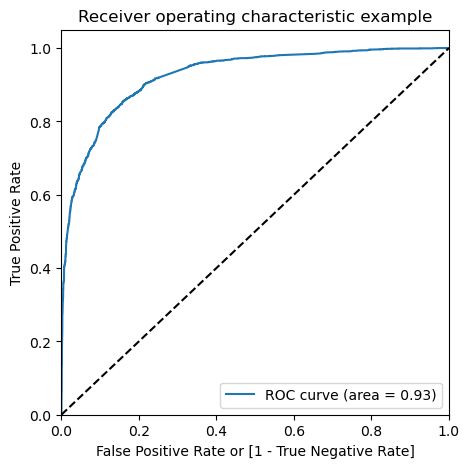

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [97]:
# Our ROC curve is also intact. It is infact hugging the left wall

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.777265,8174,1,1,1,1,1,1,1,1,1,0,0
1,1,0.984645,6986,1,1,1,1,1,1,1,1,1,1,1
2,1,0.992249,8112,1,1,1,1,1,1,1,1,1,1,1
3,0,0.092808,8530,0,1,0,0,0,0,0,0,0,0,0
4,0,0.847149,6444,1,1,1,1,1,1,1,1,1,1,0


In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383562  1.000000  0.000000
0.1   0.1  0.741773  0.964286  0.603321
0.2   0.2  0.819871  0.912151  0.762452
0.3   0.3  0.842544  0.862890  0.829885
0.4   0.4  0.852622  0.815271  0.875862
0.5   0.5  0.855613  0.779146  0.903193
0.6   0.6  0.844119  0.704023  0.931290
0.7   0.7  0.837506  0.649015  0.954789
0.8   0.8  0.820343  0.571018  0.975479
0.9   0.9  0.780192  0.446223  0.987995


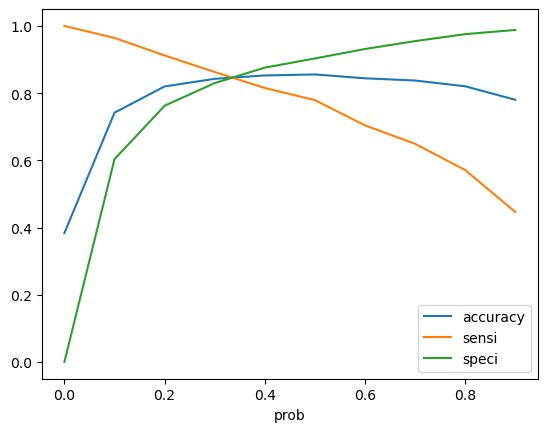

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.777265,8174,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.984645,6986,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.992249,8112,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.092808,8530,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.847149,6444,1,1,1,1,1,1,1,1,1,1,0,1


### Step 11: Making predictions on the test set

In [102]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Hearsay_Advertisements,Hearsay_Email,Hearsay_Multiple Sources,Hearsay_Online Search,Hearsay_Other,Hearsay_SMS,Hearsay_Social Media,Hearsay_Student of SomeSchool,Hearsay_Word Of Mouth,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3374,0,0,0.592434,-0.754065,0.232881,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4262,0,0,-0.824724,-0.869998,-1.013362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7855,0,0,-0.116145,-0.717261,0.232881,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

Making predictions on the test set

In [103]:
X_test_sm = sm.add_constant(X_test[col])

In [104]:
# Getting the predicted values on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3374    0.206315
4262    0.185776
7855    0.017332
3017    0.354857
560     0.995930
605     0.056012
5089    0.911435
6202    0.049594
4534    0.861233
6667    0.532127
dtype: float64

In [105]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
# Let's see the head
y_pred_1.head()

,0
3374,0.206315
4262,0.185776
7855,0.017332
3017,0.354857
560,0.995930


In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [108]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [109]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [110]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [111]:
y_pred_final.head()

,Converted,CustID,0
0,0,3374,0.206315
1,0,4262,0.185776
2,0,7855,0.017332
3,1,3017,0.354857
4,1,560,0.995930


In [112]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [113]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID', 'Converted', 'Converted_Prob'])

In [114]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,3374,0,0.206315
1,4262,0,0.185776
2,7855,0,0.017332
3,3017,1,0.354857
4,560,1,0.995930


In [115]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [116]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,3374,0,0.206315,0
1,4262,0,0.185776,0
2,7855,0,0.017332,0
3,3017,1,0.354857,0
4,560,1,0.995930,1


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.85200146896805

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1513,  211],
       [ 192,  807]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8078078078078078

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8776102088167054

In [122]:
# Calculate false postive rate - predicting conveted when customer has not converted
print(FP/ float(TN+FP))

0.12238979118329467


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8873900293255131


### Plotting ROC curve for test data

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

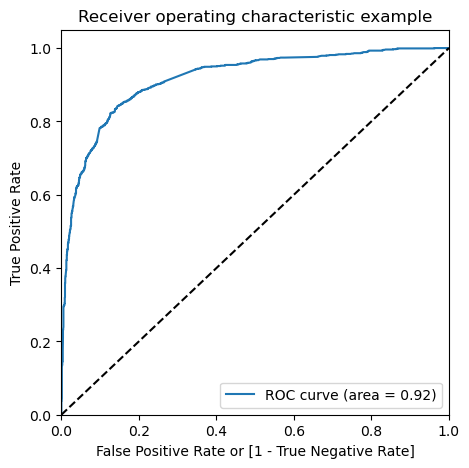

In [125]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

- Teh ROC curve for the test data also looks good along with other metrics like sensitivity and specificity hence, We can conclude 
that our model is effective and accurately predicts wheather a lead will convert to be a customer or not.